In [1]:
%matplotlib inline

In [2]:
import pycircos
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
#Set chromosomes
circle = Gcircle(figsize=(8,8)) 
with open("sample_data/example_data_chromosome_general.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)
        circle.add_garc(arc) 

<Figure size 576x576 with 0 Axes>

In [4]:
circle.set_garcs(-65,245) 

In [5]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=None) 

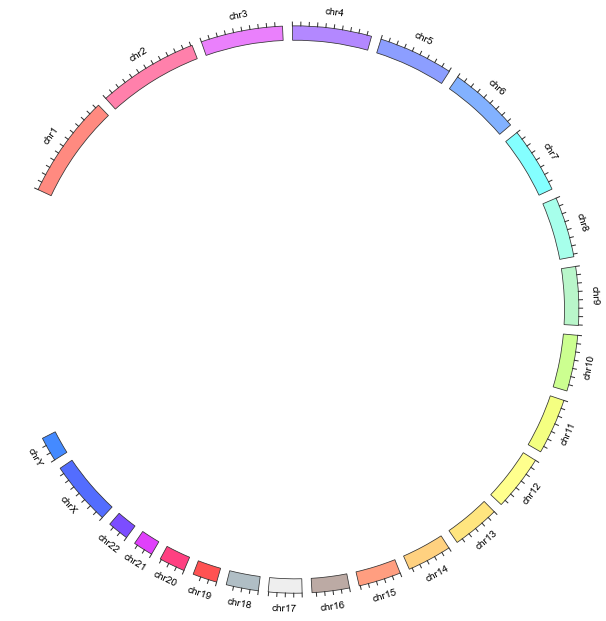

In [6]:
circle.figure

In [7]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", 
               "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_chromosome_cytoband.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[935,985], facecolor=arcdata_dict[key]["colors"])    

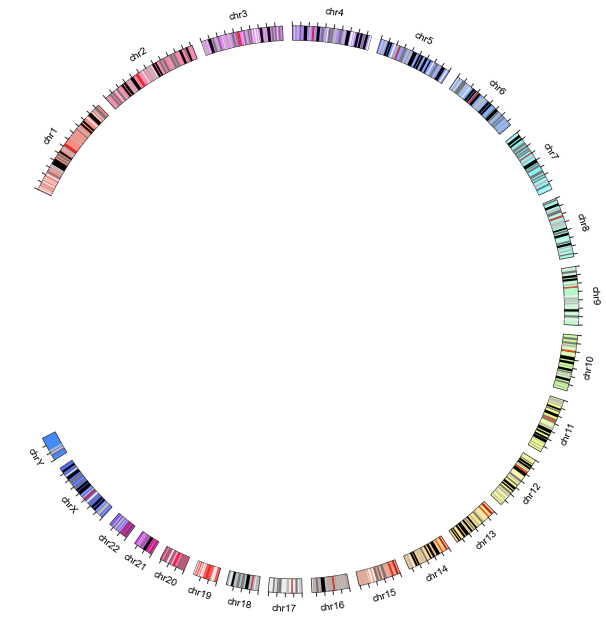

In [8]:
circle.figure

In [9]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_point.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(845,925), facecolor="orangered", spine=True) 

In [10]:
#line plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_point.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.lineplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                    rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(755,835), linecolor="royalblue", spine=False) 

In [11]:
#circle.figure

In [12]:
#bar plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_barplot.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        width = end-start 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["values"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:  
    circle.barplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], base_value=0.0, rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
                   raxis_range=[665,745], facecolor="y", spine=True)

In [13]:
#circle.figure

In [14]:
#heatmap
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_rect_gradual.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        width = end-start 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["values"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.heatmap(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[615,655], vmin=vmin, vmax=vmax, 
                   cmap=plt.cm.viridis)

In [15]:
#circle.figure

In [16]:
#linkplot
#heatmap
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_links.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name1  = line[0]     
        start1 = int(line[1])-1
        end1   = int(line[2])
        name2  = line[3]     
        start2 = int(line[4])-1
        end2   = int(line[5])
        source = (name1, start1, end1, 615)
        destination = (name2, start2, end2, 615)
        circle.chord_plot(source, destination, facecolor=circle.garc_dict[name1].facecolor)

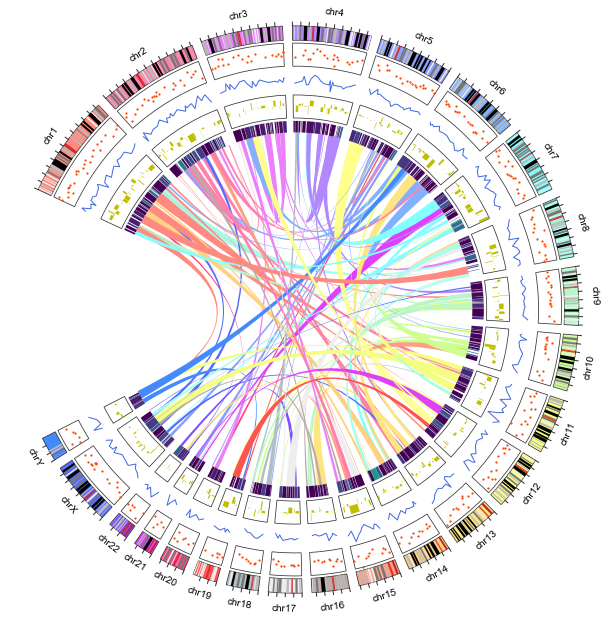

In [17]:
circle.figure

In [18]:
circle.figure.savefig("tutotial.pdf")